In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

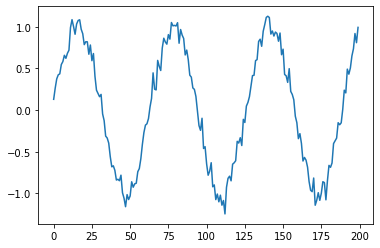

In [13]:
plt.plot(series)
plt.show()

In [14]:
X = []
y = []
T = 10
for i in range(len(series)-T):
    X.append(series[i:i+T])
    y.append(series[i+T])

In [15]:
X= np.expand_dims(X, -1)
y = np.array(y)
X.shape, y.shape

((190, 10, 1), (190,))

In [16]:
i = tf.keras.layers.Input(shape=(T,1))
x = tf.keras.layers.SimpleRNN(5)(i)            #defult activation is tanh
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(i, x)

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.1), loss='mse')

In [17]:
N = X.shape[0]

r = model.fit( X[:N//2], y[:N//2], validation_data=(X[N//2:], y[N//2:]), epochs=80)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 6s 67ms/sample - loss: 0.6656 - val_loss: 0.3306
Epoch 2/80
95/95 [==============================] - 0s 4ms/sample - loss: 0.1924 - val_loss: 0.1778
Epoch 3/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.1426 - val_loss: 0.1511
Epoch 4/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.1215 - val_loss: 0.0646
Epoch 5/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.0615 - val_loss: 0.0735
Epoch 6/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.0955 - val_loss: 0.0633
Epoch 7/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.0518 - val_loss: 0.0305
Epoch 8/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.0395 - val_loss: 0.0562
Epoch 9/80
95/95 [==============================] - 0s 2ms/sample - loss: 0.0526 - val_loss: 0.0397
Epoch 10/80
95/95 [==============================] - 0s

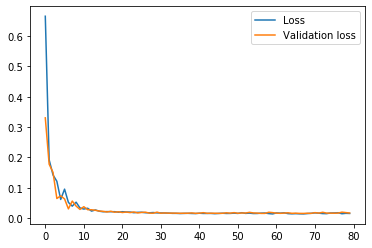

In [18]:
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [19]:
y_hat = []

X_useful = series[N//2 : N//2+10]

for i in range(N//2-10):
    x_last = model.predict(X_useful[i:i+10].reshape(1, 10, 1))[0, 0]
    y_hat.append(x_last)
    X_useful = np.append(X_useful, x_last)

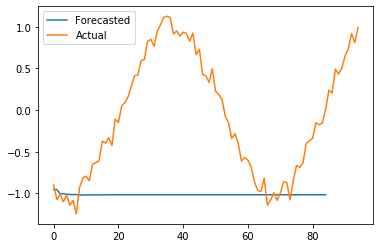

In [20]:
plt.plot(y_hat, label='Forecasted')
plt.plot(y[N//2:], label='Actual')
plt.legend()
plt.show()